In [1]:
from beta_TCVAE import beta_TCVAE
beta_TCVAE = beta_TCVAE( training =True, lr=0.001)

Load_image_dataset?[yes/no] no
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use keras.layers.batch_normalization instead.
Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.


In [2]:
beta_TCVAE.fit(epoch=300)
beta_TCVAE.Save()

100%|██████████| 300/300 [13:44:14<00:00, 165.08s/it]  


In [6]:
mean = beta_VAE.dataset.mean()
std = beta_VAE.dataset.std()

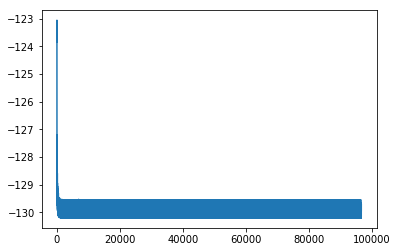

In [5]:
import matplotlib.pyplot as plt
plt.plot(beta_VAE.loss_list)
plt.show()

In [3]:
beta_VAE.Save()

####  求总体样本的均值,方差

In [64]:
from tqdm import tqdm
dataset=[]
for i in tqdm(range(20608)):
    tran_file_path = \
            '/home/baxter/catkin_ws/src/huang/scripts/explore_transitions/exp_transition%d.npy' \
            % (i + 1)
    transition = np.load(tran_file_path, allow_pickle=True)
    transition = transition.tolist()
    dataset.append(transition['observe0_img'][:,:,[2,1,0]])
    dataset.append(transition['observe1_img'][:,:,[2,1,0]])
dataset = np.array(dataset, dtype=np.float32)

mean = dataset.mean() # 116.73773
std = dataset.std()  # 57.21839
print mean
print std

100%|██████████| 20608/20608 [00:14<00:00, 1390.40it/s]


116.77986
57.100357


In [2]:
mean = 116.77986
std = 57.100357

In [12]:
beta_VAE.load()

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /home/baxter/Documents/beta-vae/checkpoints/model.ckpt


In [62]:
true_images = tf.zeros([5,256,256,3])
reconstructed_images = tf.zeros([5,256,256,3])

flattened_dim = np.prod(true_images.get_shape().as_list()[1:])
reconstructed_images = tf.reshape(reconstructed_images, shape=[-1, flattened_dim])
true_images = tf.reshape(true_images, shape=[-1, flattened_dim])
dist = tfp.distributions.Bernoulli(
                probs=tf.clip_by_value(true_images, 1e-6, 1 - 1e-6))
loss_lower_bound = tf.reduce_sum(dist.entropy(), axis=1)

loss = tf.reduce_sum(
            tf.nn.sigmoid_cross_entropy_with_logits(
                logits=reconstructed_images, labels=true_images),
            axis=1)


In [63]:
loss

<tf.Tensor 'Sum_11:0' shape=(5,) dtype=float32>

In [20]:
import numpy as np
tran_file_path = \
                '/home/baxter/catkin_ws/src/huang/scripts/demo_transitions/demo1.npy'
transition = np.load(tran_file_path, allow_pickle=True)
transition = transition.tolist()
image_test = transition['observe1_img'][:,:,[2,1,0]]
image_test = (image_test-mean)/std
z = beta_VAE.image_disentangle(np.ones([256,256,3]))
print z

disentangle to vector z
[[0.08865082 0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]]


In [21]:
import tensorflow as tf
with tf.Session() as sess:
    print sess.run(tf.losses.mean_squared_error(image_test, beta_VAE.image_test(np.ones([256,256,3]))))

reconstruct image
0.81346494


reconstruct image


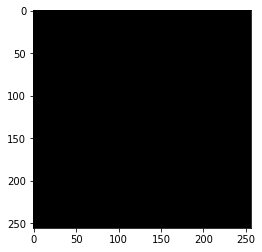

In [22]:
import matplotlib.pyplot as plt
plt.imshow(beta_VAE.image_test(np.ones([256,256,3])))
plt.show()